In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
import joblib

#### Load the heart disease data into a Pandas DataFrame

In [2]:

url_data=''
df = pd.read_csv(url_data)

#### Explore the data

In [25]:

df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [27]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [29]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Visualize the data


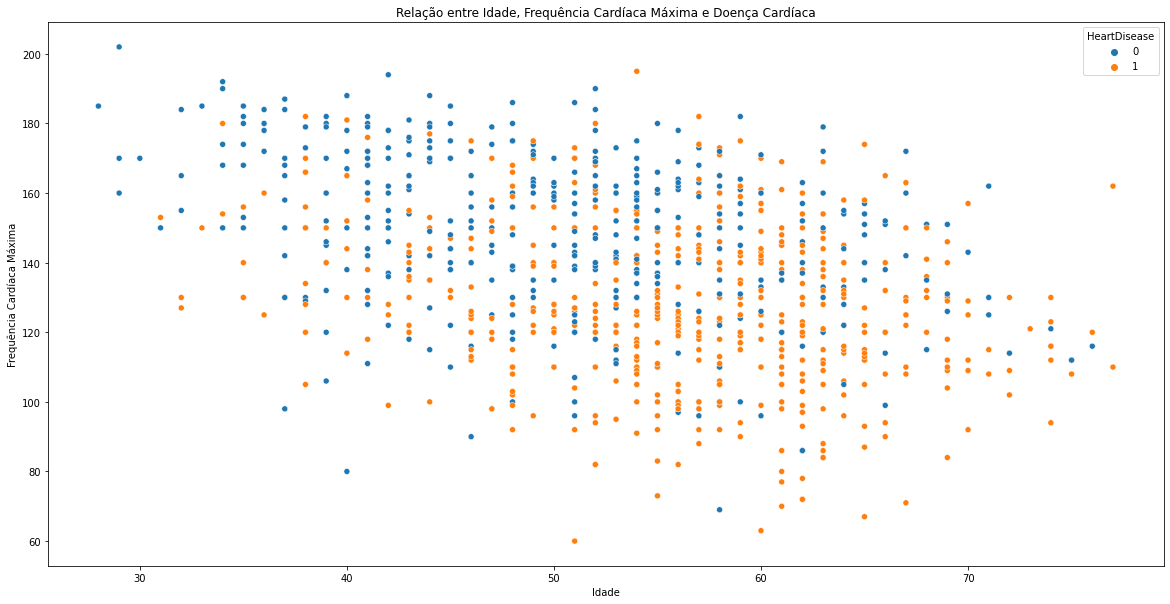

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Age", y="MaxHR",hue='HeartDisease', data=df)
plt.title("Relação entre Idade, Frequência Cardíaca Máxima e Doença Cardíaca")
plt.xlabel("Idade")
plt.ylabel("Frequência Cardíaca Máxima")
plt.show()

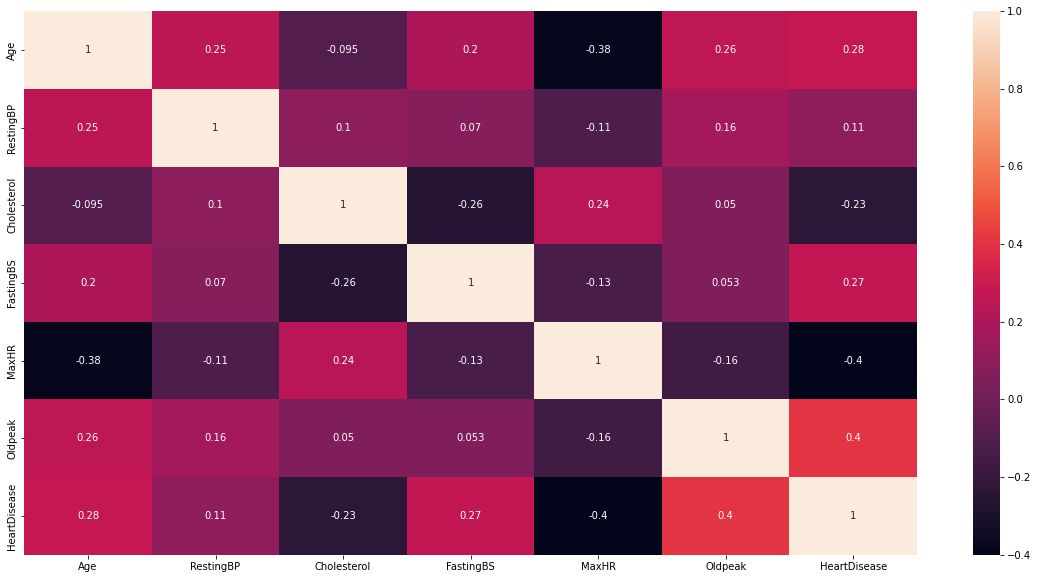

In [31]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

#### Analyze the data


In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


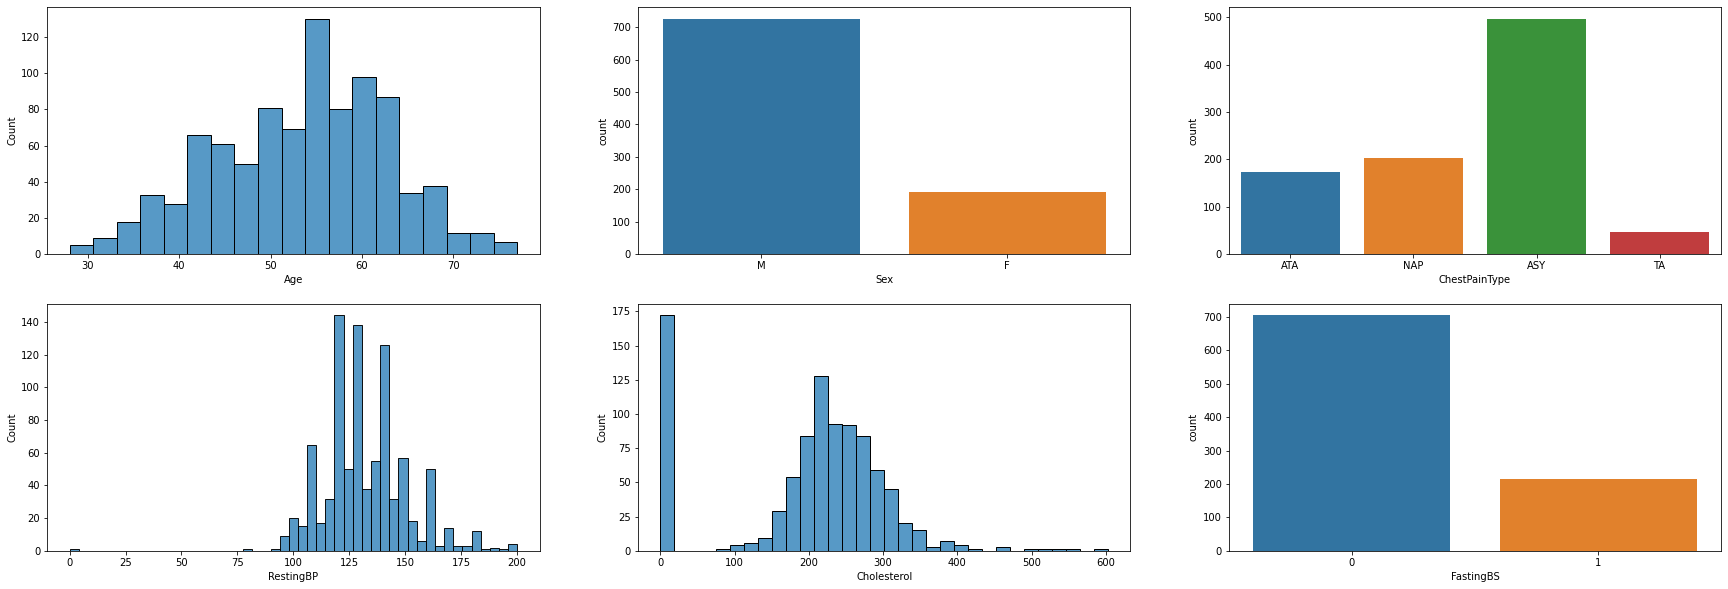

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
sns.histplot(x="Age", data=df, ax=ax[0, 0])
sns.countplot(x="Sex", data=df, ax=ax[0, 1])
sns.countplot(x="ChestPainType", data=df, ax=ax[0, 2])
sns.histplot(x="RestingBP", data=df, ax=ax[1, 0])
sns.histplot(x="Cholesterol", data=df, ax=ax[1, 1])
sns.countplot(x="FastingBS", data=df, ax=ax[1, 2])
plt.show()

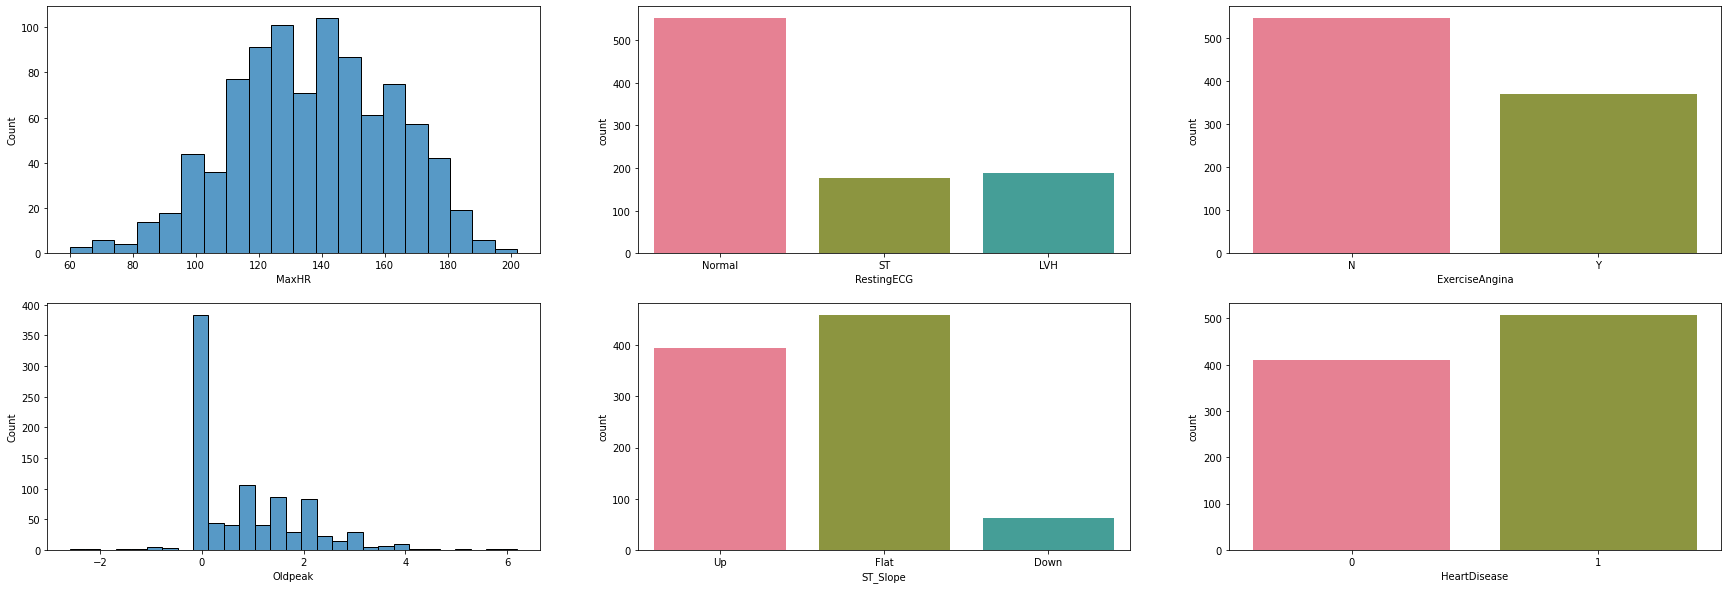

In [48]:
palette = sns.color_palette("husl", 4)
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
sns.histplot(x="MaxHR", data=df, ax=ax[0, 0],palette=palette)
sns.countplot(x="RestingECG", data=df, ax=ax[0, 1],palette=palette)
sns.countplot(x="ExerciseAngina", data=df, ax=ax[0, 2],palette=palette)
sns.histplot(x="Oldpeak", data=df, ax=ax[1, 0],palette=palette)
sns.countplot(x="ST_Slope", data=df, ax=ax[1, 1],palette=palette)
sns.countplot(x="HeartDisease", data=df, ax=ax[1, 2],palette=palette)
plt.show()

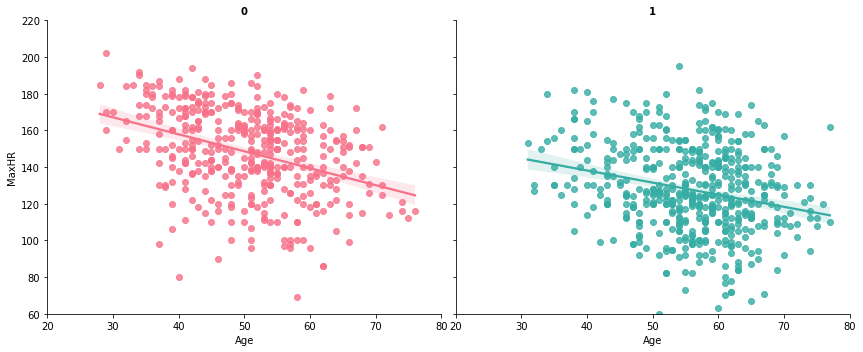

In [38]:
palette = sns.color_palette("husl", 2)
g = sns.lmplot(x='Age', y='MaxHR', data=df, hue='HeartDisease' , col='HeartDisease', palette=palette, height=5, aspect=1.2)
g.set_titles(col_template="{col_name}", fontweight='bold')
g.set_xlabels('Age')
g.set_ylabels('MaxHR')
g.set(xlim=(20, 80), ylim=(60, 220))
plt.show()

In [2]:
import requests

headers = {
    'accept': 'application/json',
    'Content-Type': 'application/json',
}

json_data = {
    'categorical_features': {
        'Age': 40,
        'RestingBP': 140,
        'Cholesterol': 289,
        'FastingBS': 0,
        'MaxHR': 178,
    },
    'numerical_features': {
        'Sex': 'M',
        'ChestPainType': 'ATA',
        'RestingECG': 'Normal',
        'ExerciseAngina': 'N',
        'ST_Slope': 'Up',
    },
}

response = requests.post('http://127.0.0.1:8000/predict', headers=headers, json=json_data)
print(response.status_code)
print(response.json())

200
{'predictions': [0], 'probabilities': [0.1964183896780014]}
